<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [222]:
# Import necessary libraries
import torch
from torch import nn
from sklearn.model_selection import train_test_split

In [223]:
# Setup device-agnostic code
device = torch.device(device = 'cuda:0')

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [224]:
# Create the data parameters
w, b = 0.3, 0.9

# Make X and y using linear regression feature
X = torch.arange(0, 1, 0.01, device = device).unsqueeze(1)
y = X*w + b

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")
print(X.shape, y.shape)

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]], device='cuda:0')
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]], device='cuda:0')
torch.Size([100, 1]) torch.Size([100, 1])


In [225]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
X_train.shape, y_train.shape

(torch.Size([80, 1]), torch.Size([80, 1]))

<Axes: xlabel='None', ylabel='None'>

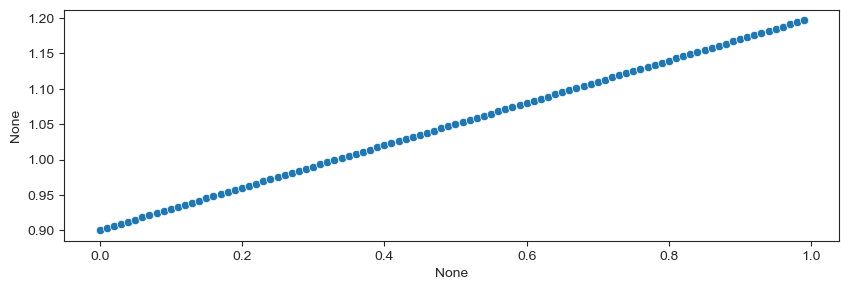

In [226]:
# Plot the training and testing data 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style = 'ticks')
plt.figure(figsize=(10,3))
sns.scatterplot(x = X[:,0].to(torch.device('cpu')), y = y[:,0].to(torch.device('cpu')))


## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [227]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(1,1)
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x):
        return self.linear_layer(x)


In [228]:
len(X_test)

20

In [229]:
# Instantiate the model and put it to the target device
model_0 = LinearRegModel()
model_0.to(device)

LinearRegModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [230]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()
optim = torch.optim.SGD(params=model_0.parameters(), lr = 0.01)

In [231]:
# Training loop
def train_loop(X_train, y_train, model, loss_fn, optim) :
  # Train model for 300 epochs
  # Send data to target device
  model.train()
  ### Training
  # 1. Forward pass
  preds = model(X_train)
  # 2. Calculate loss
  loss = loss_fn(preds, y_train)
  
  optim.zero_grad()
  loss.backward()
  optim.step()

def test_loop(X_test, y_test, model, loss_fn) :
  # Put model in evaluation mode and setup inference context 
  model.eval()
  with torch.inference_mode():
    # 1. Forward pass
    preds = model(X_test)
    # 2. Calculate test loss
    loss = loss_fn(preds, y_test)
    # Print out what's happening
    return loss

In [232]:
X_train=X_train.to(device).unsqueeze(1)
y_test=y_test.to(device).unsqueeze(1)
X_test=X_test.to(device).unsqueeze(1)
y_train=y_train.to(device).unsqueeze(1)

X_train.shape, y_train.shape

(torch.Size([80, 1, 1]), torch.Size([80, 1, 1]))

In [233]:
epochs = 301
for epoch in range(epochs) :
    train_loop(X_train, y_train, model_0, loss_fn, optim)
    if epoch%20==0:
        loss = test_loop(X_test, y_test, model_0, loss_fn)
        print(f"epoch {epoch}, test_loss = {loss}")

epoch 0, test_loss = 0.9236025214195251
epoch 20, test_loss = 0.677102267742157
epoch 40, test_loss = 0.43060213327407837


epoch 60, test_loss = 0.1841019243001938
epoch 80, test_loss = 0.04815170168876648
epoch 100, test_loss = 0.03548961132764816
epoch 120, test_loss = 0.025755906477570534
epoch 140, test_loss = 0.016085941344499588
epoch 160, test_loss = 0.006415957119315863
epoch 180, test_loss = 0.002733913017436862
epoch 200, test_loss = 0.002733913017436862
epoch 220, test_loss = 0.002733913017436862
epoch 240, test_loss = 0.002733913017436862
epoch 260, test_loss = 0.002733913017436862
epoch 280, test_loss = 0.002733913017436862
epoch 300, test_loss = 0.002733913017436862


In [240]:
print(model_0.state_dict())

OrderedDict([('linear_layer.weight', tensor([[0.3030]], device='cuda:0')), ('linear_layer.bias', tensor([0.9013], device='cuda:0'))])


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [236]:
# Plot the predictions (these may need to be on a specific device)


## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [242]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path('d')

# 2. Create model save path 

# 3. Save the model state dict


In [238]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)


In [239]:
# Make predictions with loaded model and compare them to the previous
